            Open  High   Low  Close    Volume
Date                                         
2014-01-02  2.62  2.62  2.59   2.61  41632500
2014-01-03  2.60  2.61  2.56   2.56  45517700
2014-01-06  2.57  2.57  2.50   2.53  68674700
2014-01-07  2.51  2.52  2.49   2.52  53293800
2014-01-08  2.51  2.54  2.49   2.51  69087900
...          ...   ...   ...    ...       ...
2014-06-24  2.74  2.76  2.73   2.75  24819000
2014-06-25  2.75  2.77  2.74   2.77  32276400
2014-06-26  2.77  2.78  2.75   2.77  59990100
2014-06-27  2.58  2.58  2.53   2.54  47758400
2014-06-30  2.55  2.56  2.54   2.55  23791500

[127 rows x 5 columns]
            Open  High   Low  Close    Volume
Date                                         
2014-01-02  2.62  2.62  2.59   2.61  41632500
2014-01-03  2.60  2.61  2.56   2.56  45517700
2014-01-06  2.57  2.57  2.50   2.53  68674700
2014-01-07  2.51  2.52  2.49   2.52  53293800
2014-01-08  2.51  2.54  2.49   2.51  69087900
...          ...   ...   ...    ...       ...
2014-03-25

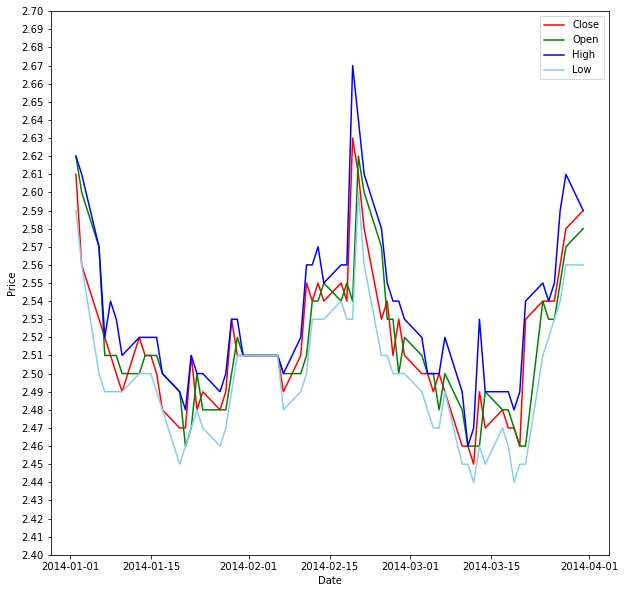

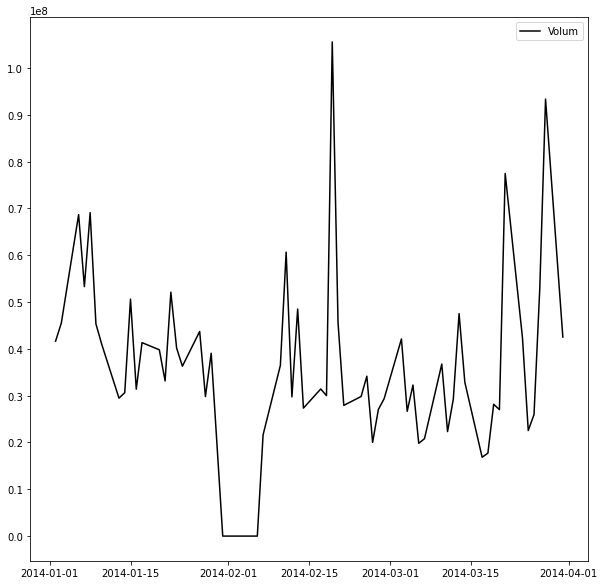

In [2]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
ChinaBank = pd.read_csv('ChinaBank.csv',index_col = 'Date',parse_dates=['Date']).drop(labels="Unnamed: 0",axis=1)
#ChinaBank.index = pd.to_datetime(ChinaBank.index)
sub = ChinaBank['2014-01':'2014-06']
print(sub)
train = sub.loc['2014-01':'2014-03']
test = sub.loc['2014-04':'2014-06']
plt.figure(figsize=(10,10))
print(sub.loc['2014-01':'2014-03'])
plt.plot(train["Close"],color='red',label="Close")
plt.plot(train["Open"],color='green',label="Open")
plt.plot(train["High"],color='blue',label="High")
plt.plot(train["Low"],color='skyblue',label="Low")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.yticks(np.arange(2.4,2.7,0.01))
plt.show()
plt.figure(figsize=(10,10))
plt.plot(train["Volume"],color='black',label="Volum")
plt.legend()
plt.yticks(np.arange(0,train["Volume"].max()+1e6,1e7))
plt.show()

-732.9559253261352


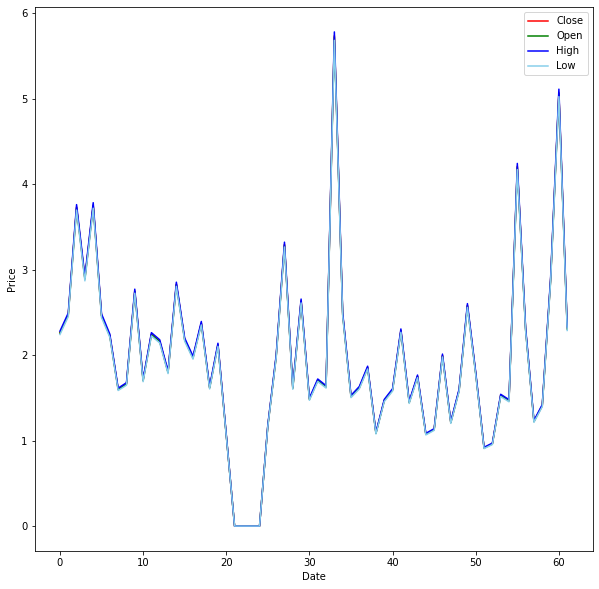

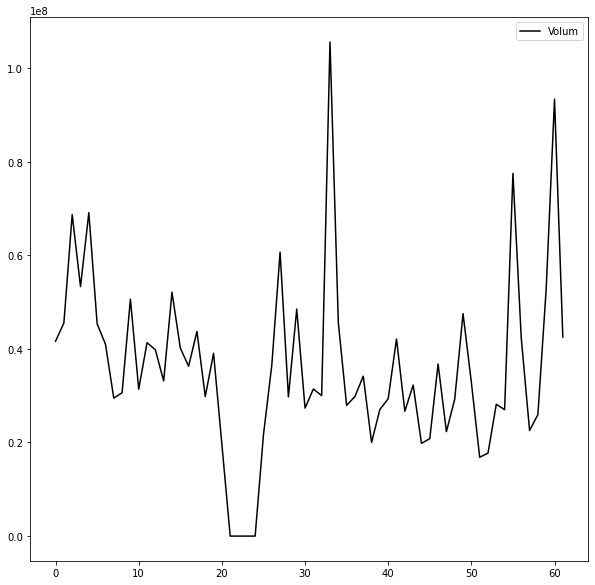

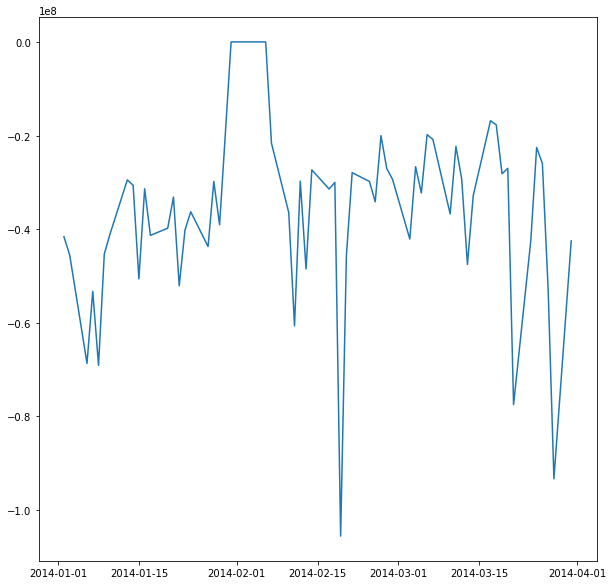

In [3]:
from sklearn.metrics import r2_score
nptrain=train.to_numpy()
#print(nptrain)
u,s,vt=np.linalg.svd(nptrain)
#print(u)
#print(s)
#print(vt)
svdtrain=np.dot(vt[:1,:],np.mat(nptrain).T).T
predict_sunspots02=np.dot(svdtrain,vt[:1,:])
print(r2_score(nptrain, predict_sunspots02))
#print(predict_sunspots02)
plt.figure(figsize=(10,10))
plt.plot(predict_sunspots02[...,3],color='red',label="Close")
plt.plot(predict_sunspots02[...,0],color='green',label="Open")
plt.plot(predict_sunspots02[...,1],color='blue',label="High")
plt.plot(predict_sunspots02[...,2],color='skyblue',label="Low")
#plt.plot(train["Volume"],color='blacl')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
plt.figure(figsize=(10,10))
plt.plot(predict_sunspots02[...,4],color='black',label="Volum")
plt.legend()
plt.show()
#print(svdtrain)
dataFrame=pd.DataFrame(svdtrain).set_index(train.index)
#print(dataFrame)
plt.figure(figsize=(10,10))
plt.plot(dataFrame)
plt.show()

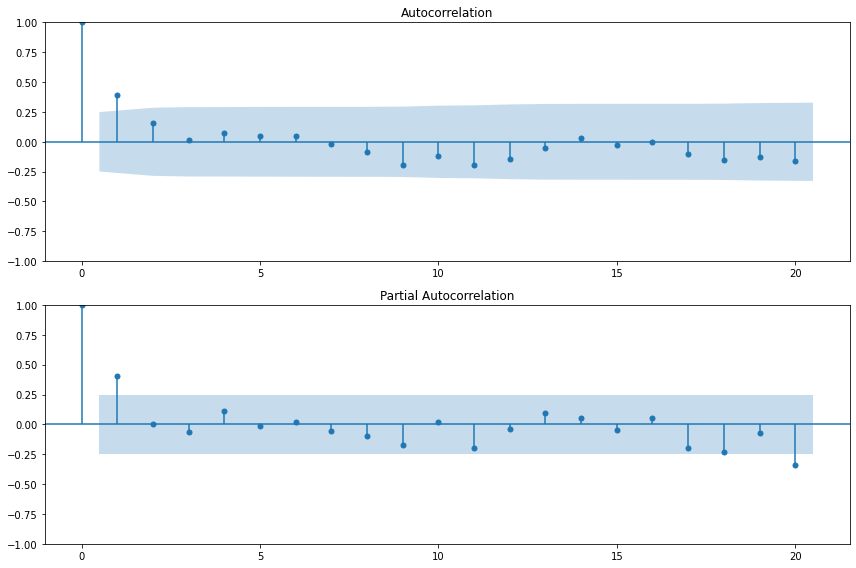

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataFrame[0], lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataFrame[0], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

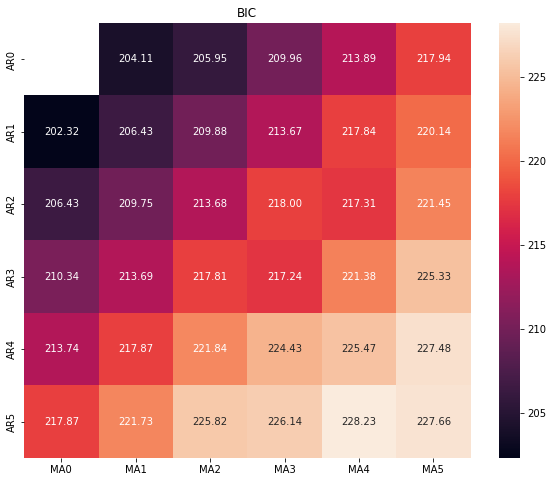

In [ ]:
 #遍历，寻找适宜的参数
import itertools
import numpy as np
import seaborn as sns
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                            columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
for p,d,q in itertools.product(range(p_min,p_max+1),
                                range(d_min,d_max+1),
                                range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = sm.tsa.ARIMA(dataFrame[0], order=(p, d, q),
                            #enforce_stationarity=False,
                            #enforce_invertibility=False,
                            )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                mask=results_bic.isnull(),
                ax=ax,
                annot=True,
                fmt='.2f',
                )
ax.set_title('BIC')
plt.show()

[-38570008.07790139 -37087313.4602636  -36530322.44744585
 -36321082.46999587 -36242479.10449131 -36212950.86068273
 -36201858.24172397 -36197691.17387658 -36196125.76768088
 -36195537.70512771 -36195316.79277449 -36195233.80454893
 -36195202.62908281 -36195190.91766616 -36195186.51813995
 -36195184.86540814 -36195184.24454074 -36195184.01130487
 -36195183.92368717 -36195183.8907726  -36195183.87840786
 -36195183.87376291]
[[-38570008.07790139]
 [-37087313.4602636 ]
 [-36530322.44744585]
 [-36321082.46999587]
 [-36242479.10449131]
 [-36212950.86068273]
 [-36201858.24172397]
 [-36197691.17387658]
 [-36196125.76768088]
 [-36195537.70512771]
 [-36195316.79277449]
 [-36195233.80454893]
 [-36195202.62908281]
 [-36195190.91766616]
 [-36195186.51813995]
 [-36195184.86540814]
 [-36195184.24454074]
 [-36195184.01130487]
 [-36195183.92368717]
 [-36195183.8907726 ]
 [-36195183.87840786]
 [-36195183.87376291]]
[[2.09245422e+00 2.11336354e+00 2.07738705e+00 2.09761679e+00
  3.85700081e+07]
 [2.0120

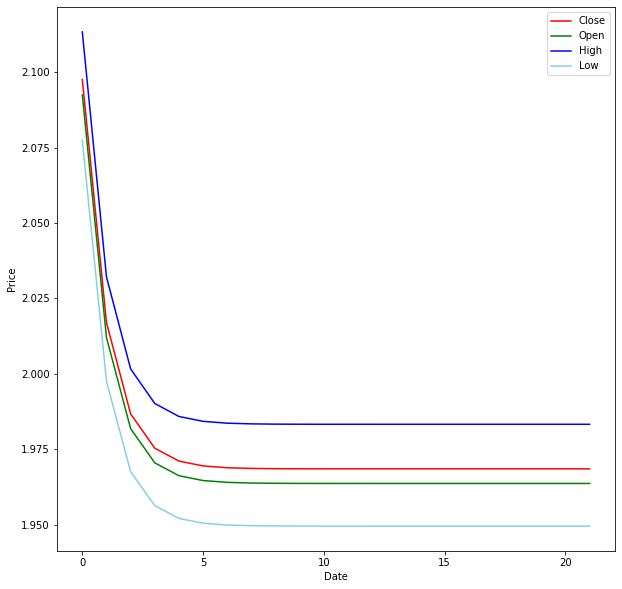

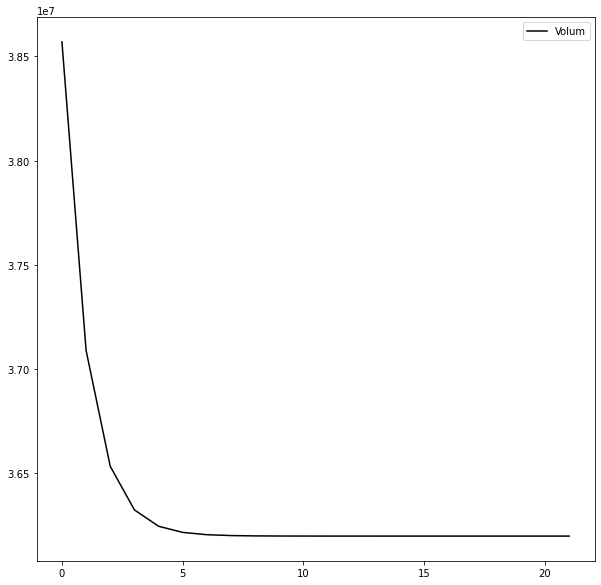

In [ ]:
model = sm.tsa.ARIMA(dataFrame[0], order=(1, 0, 0))
results = model.fit()
predict_sunspots = results.predict(start=62,end=83,dynamic=False)
predict_sunspots=predict_sunspots.to_numpy()
print(predict_sunspots)
predict_sunspots01=np.empty([22,1])
for i in range(22):
    predict_sunspots01[i][0]=predict_sunspots[i]
print(predict_sunspots01)
    
    #a=(vt X AT)T=AV
predict_sunspots02=np.dot(predict_sunspots01,vt[:1,:])
print(predict_sunspots02)
plt.figure(figsize=(10,10))
plt.plot(predict_sunspots02[...,3],color='red',label="Close")
plt.plot(predict_sunspots02[...,0],color='green',label="Open")
plt.plot(predict_sunspots02[...,1],color='blue',label="High")
plt.plot(predict_sunspots02[...,2],color='skyblue',label="Low")
#plt.plot(train["Volume"],color='blacl')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
plt.figure(figsize=(10,10))
plt.plot(predict_sunspots02[...,4],color='black',label="Volum")
plt.legend()
plt.show()
# fig, ax = plt.subplots(figsize=(12, 8))
# ax = sub.plot(ax=ax)
# predict_sunspots.plot(ax=ax)
# plt.show()

In [ ]:
model = sm.tsa.ARIMA(train, order=(1, 0, 0))
results = model.fit()
print(results.forecast())
print(test[0])

[-38570008.07790139]


KeyError: 0